In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

%matplotlib inline

In [2]:
# json 파일을 불러옵니다. 
# dpath = '/opt/ml/input/data/ICDAR17_Korean/ufo/'
# fname = 'train.json'
dpath = '/opt/ml/input/data/Annotation/ufo/'
fname = 'annotation.json'
with Path(dpath+fname).open(encoding='utf8') as handle:
    ann = json.load(handle)

In [3]:
# json 파일을 list 이름들을 불러옵니다. 그리고 뒤죽박죽인 이름들을 정렬해줍니다.
lann = list(ann['images'])
sort_lann = sorted(lann)

In [8]:
ann['images'][sort_lann[0]]
# ann['images']['1559458822576-3.jpg']

{'paragraphs': {},
 'words': {'0': {'points': [[2264, 1215.0],
    [2754, 1235.0],
    [2784, 2475.0],
    [2344, 2430.0]],
   'orientation': 'Vertical',
   'transcription': '백일',
   'word_tags': None,
   'language': ['KO']},
  '1': {'points': [[1824.0, 490.0],
    [2289, 475.0],
    [2329, 2195.0],
    [1969.0, 2160.0]],
   'orientation': 'Vertical',
   'transcription': '이로운',
   'word_tags': None,
   'language': ['KO']}},
 'chars': {},
 'tags': {},
 'relations': {},
 'license_tag': {'usability': True,
  'public': False,
  'commercial': True,
  'type': None,
  'holder': 'Upstage'}}

In [7]:
# 리스트에 이미지별로 points, 전사, orientation 담기
lpoints = []
ltranscript = []
lhv = []
for i in range(len(sort_lann)):
    temp_lp = []
    temp_lt = []
    temp_lhv = []
    for j in range(len(ann['images'][sort_lann[i]]['words'])):
        temp_lp.append(ann['images'][sort_lann[i]]['words'][str(j)]['points'])
        temp_lt.append(ann['images'][sort_lann[i]]['words'][str(j)]['transcription'])
        temp_lhv.append(ann['images'][sort_lann[i]]['words'][str(j)]['orientation'])
        # temp_lp = np.array(temp_lp).astype('int32').tolist()
    lpoints.append(temp_lp)
    ltranscript.append(temp_lt)
    lhv.append(temp_lhv)

In [ ]:
df = pd.Dataframe()

In [25]:
# img_path = '/opt/ml/input/data/ICDAR17_Korean/images/'
img_path = '/opt/ml/input/data/Annotation/images/'

In [28]:
# num : 뽑을 이미지 갯수, start : 시작할 위치
def visual_img(num, start):
    fig, ax = plt.subplots(nrows=num, ncols=2, figsize=(10, 4*num), constrained_layout=True)
    for i in range(num):
        img = cv2.imread(img_path+sort_lann[i+start])
        oimg = cv2.imread(img_path+sort_lann[i+start])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        oimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2RGB)
        
        for j in range(len(lpoints[i+start])):
            img = cv2.polylines(img,np.array([lpoints[i+start][j]],dtype=np.int32),True,(0,255,0),10)
        
        ax[i][0].set_title(sort_lann[i+start])
        ax[i][0].imshow(img)
        ax[i][1].imshow(oimg)

    plt.show()

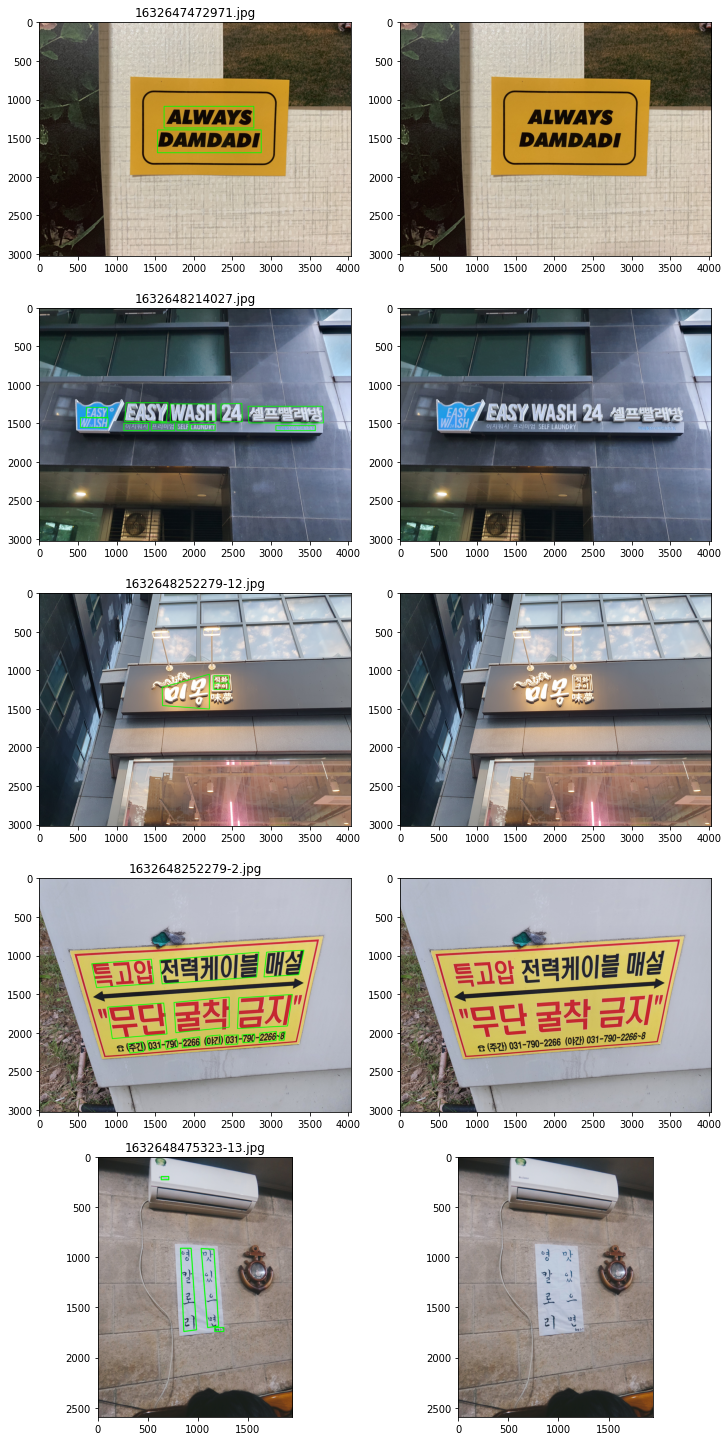

In [38]:
visual_img(5, 45)